# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

import warnings
# Reading Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Exploring Dataset
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
## To check missing values in data set
df.isnull().sum()

df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


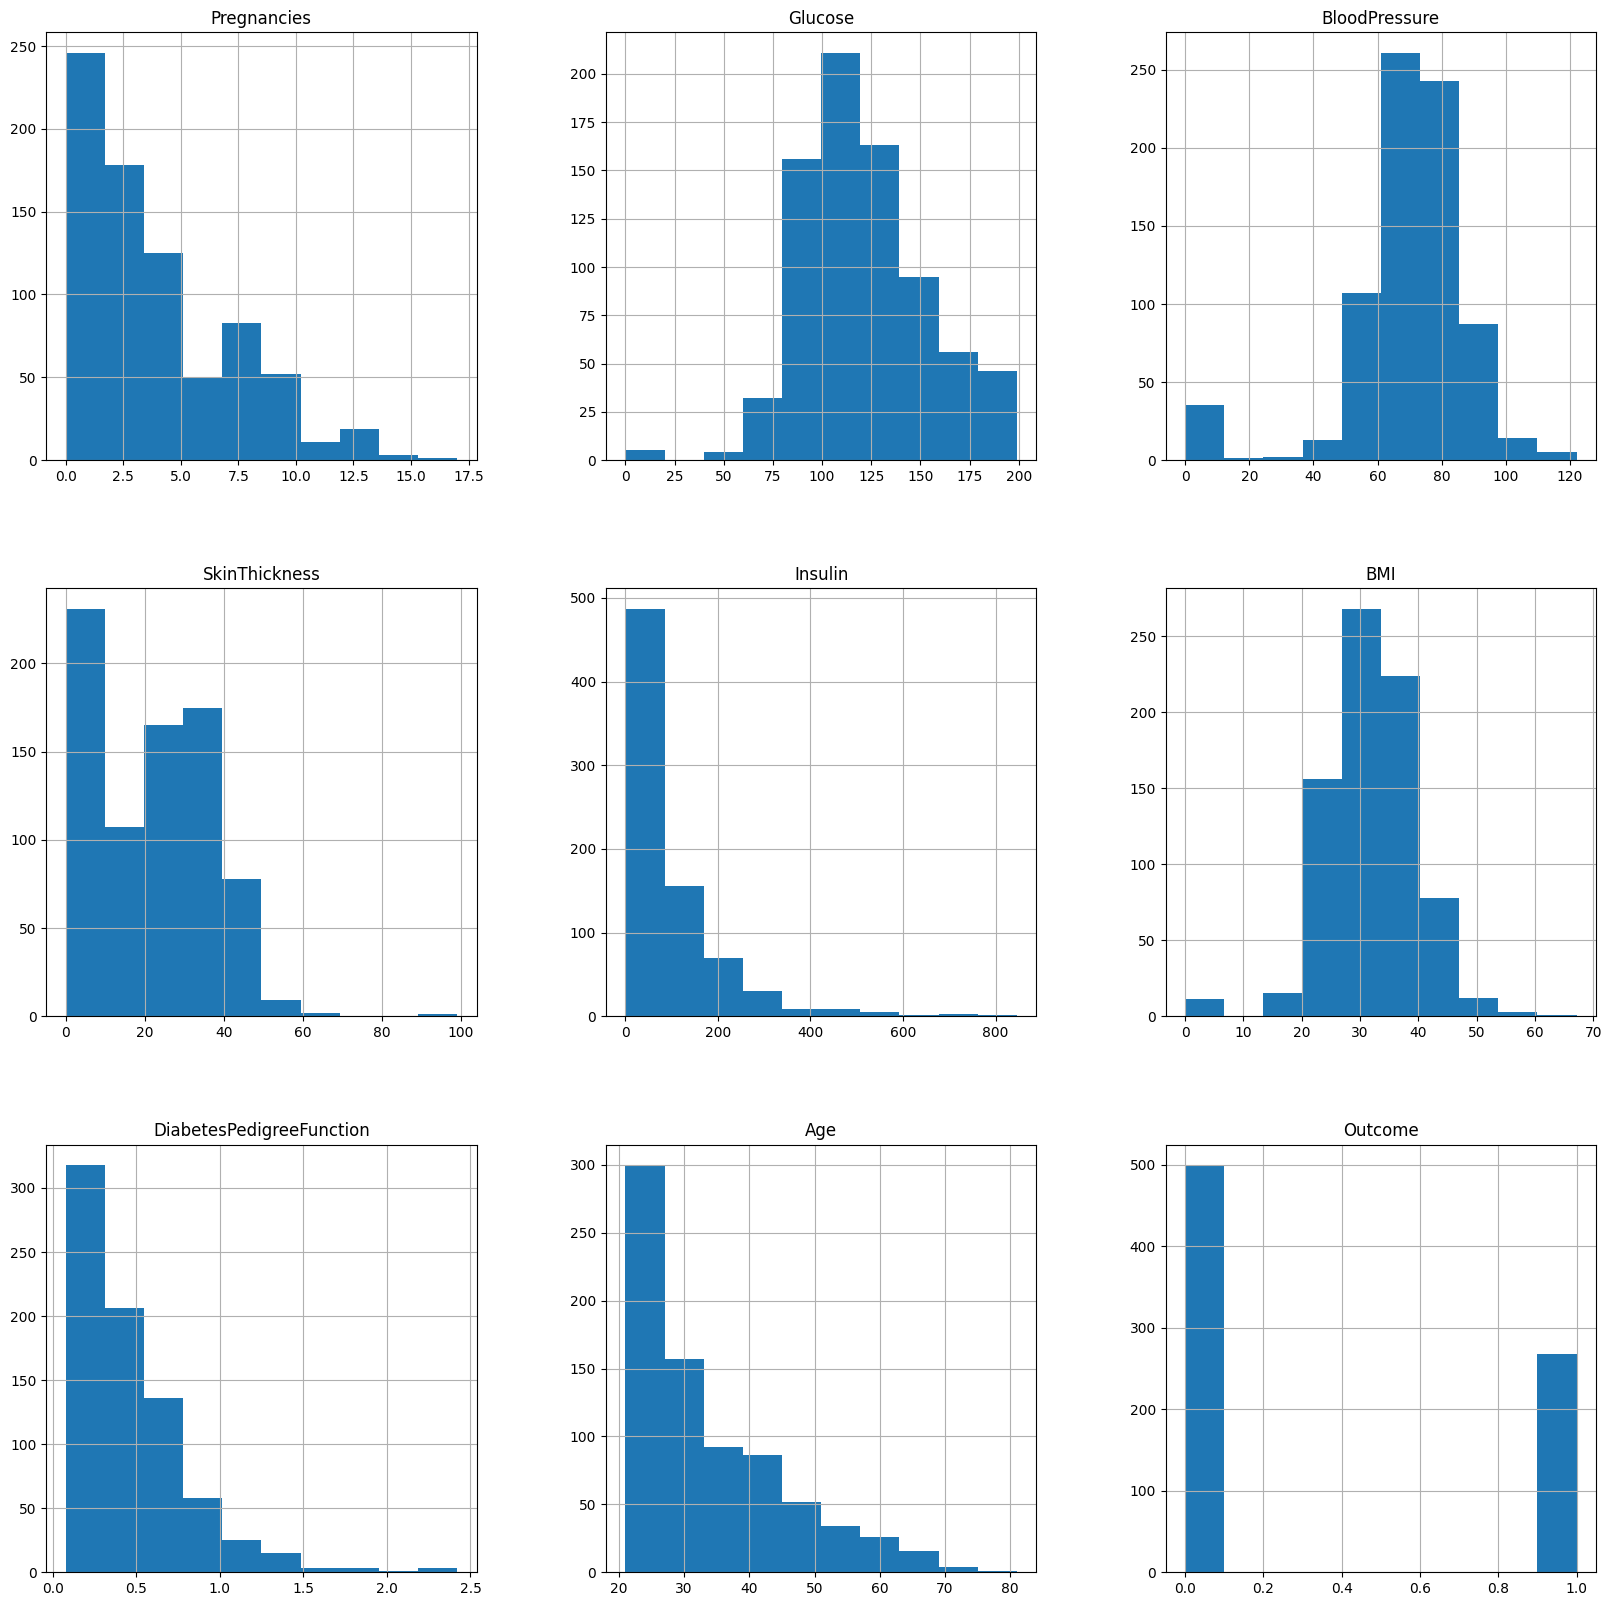

In [13]:
s = df.hist(figsize = (20,20))

We are using hist plot to see the distribution of the datasetData. The best way for analysis of the dataset is in the graphical structure which in turn lets us know the range of the data. 

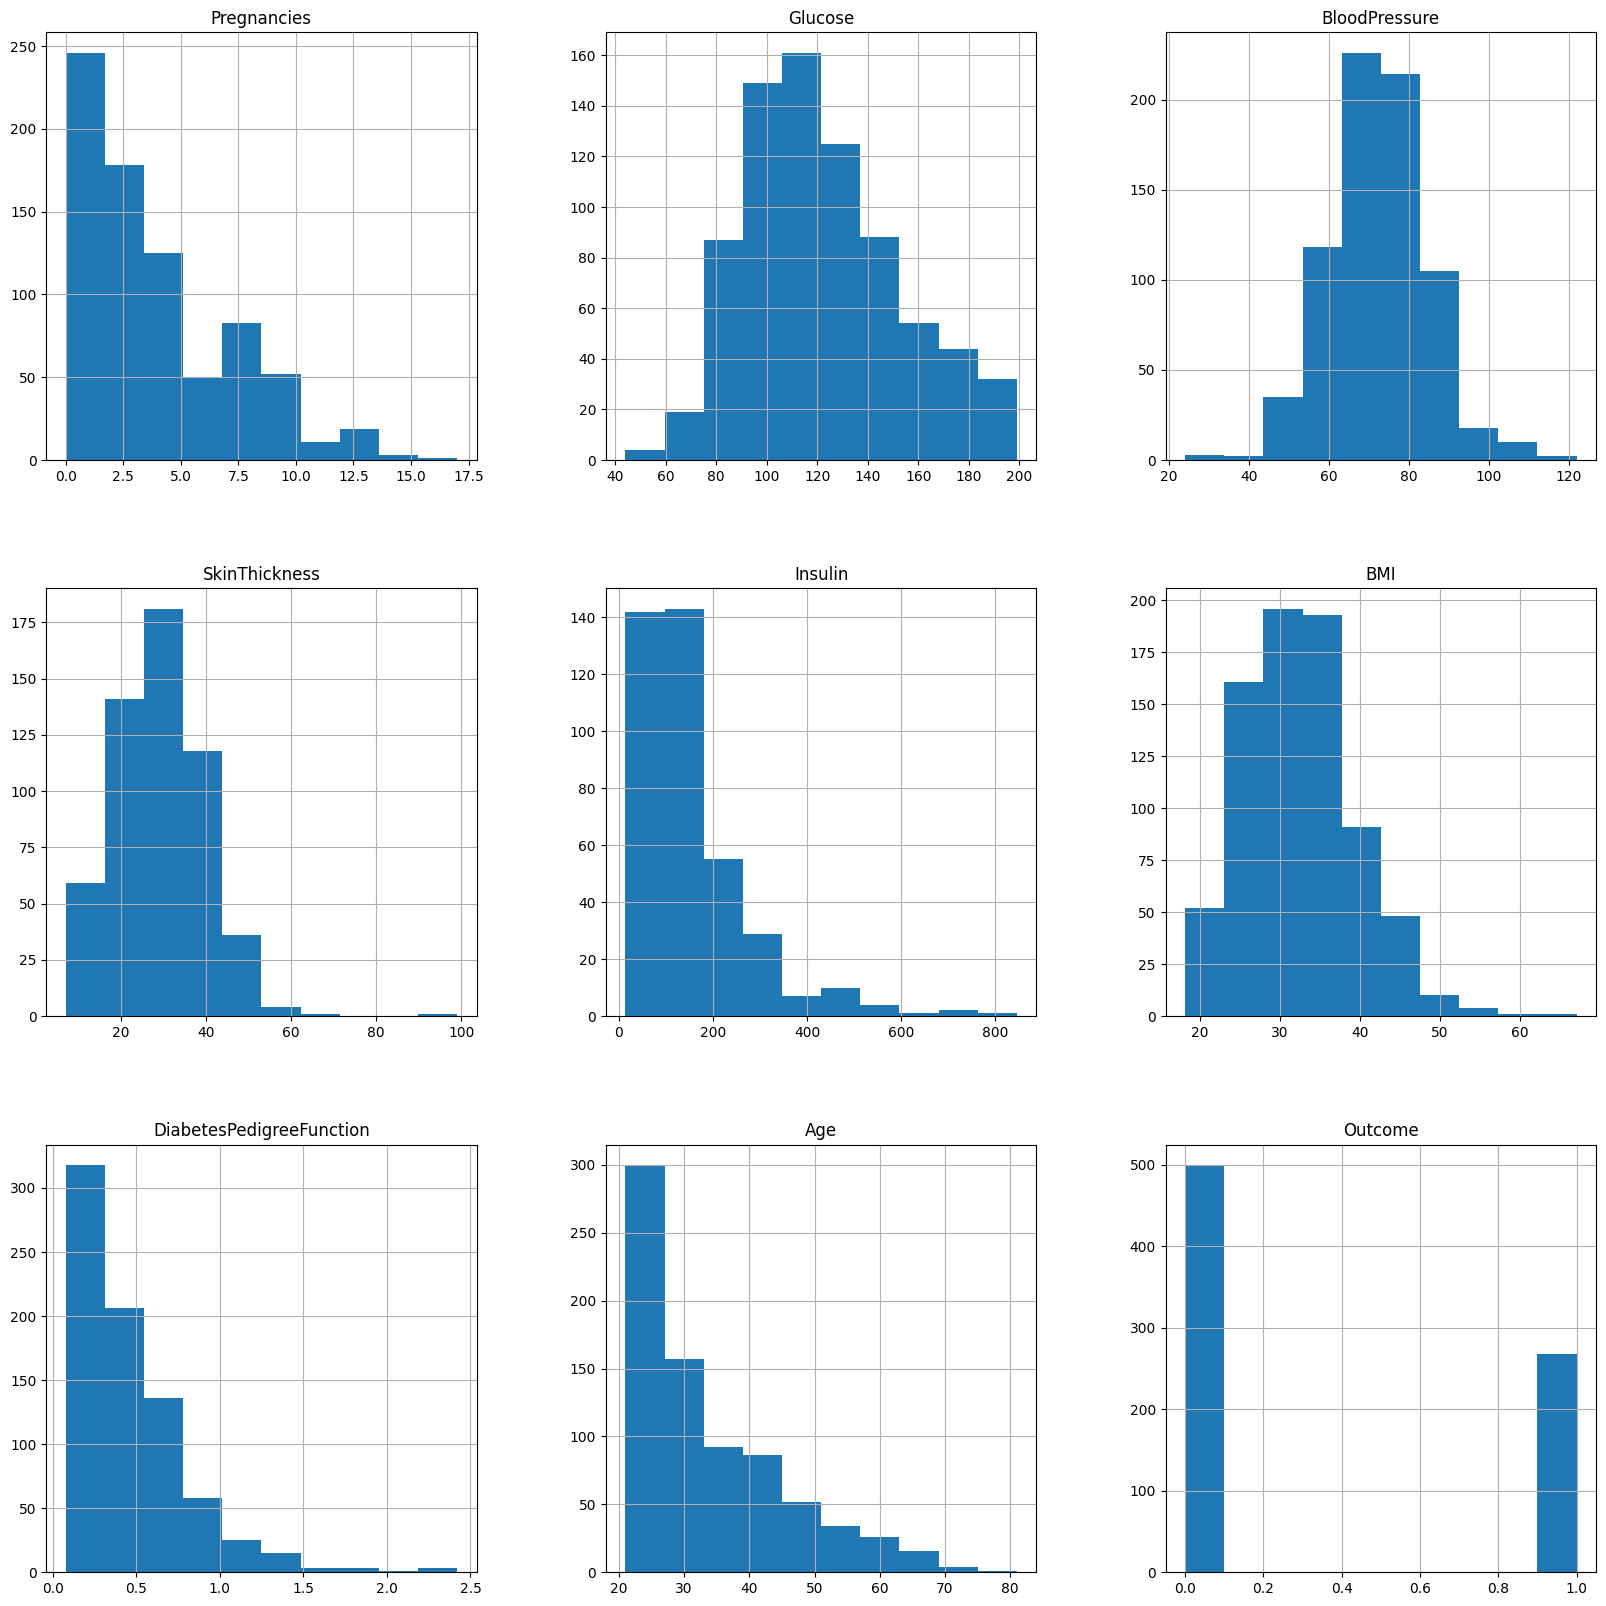

In [14]:
r = df_copy.hist(figsize = (20,20))

We are using hist plot to see the distribution of the dataset for the changes that we made afer null values are removed. We can clearly see the difference eg. In age column after removal of the null values. We can see changes on these hist plots.

In [18]:
# Relation of predictor & outcome variables
df["Outcome"].value_counts()*100/len(df)


Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [19]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

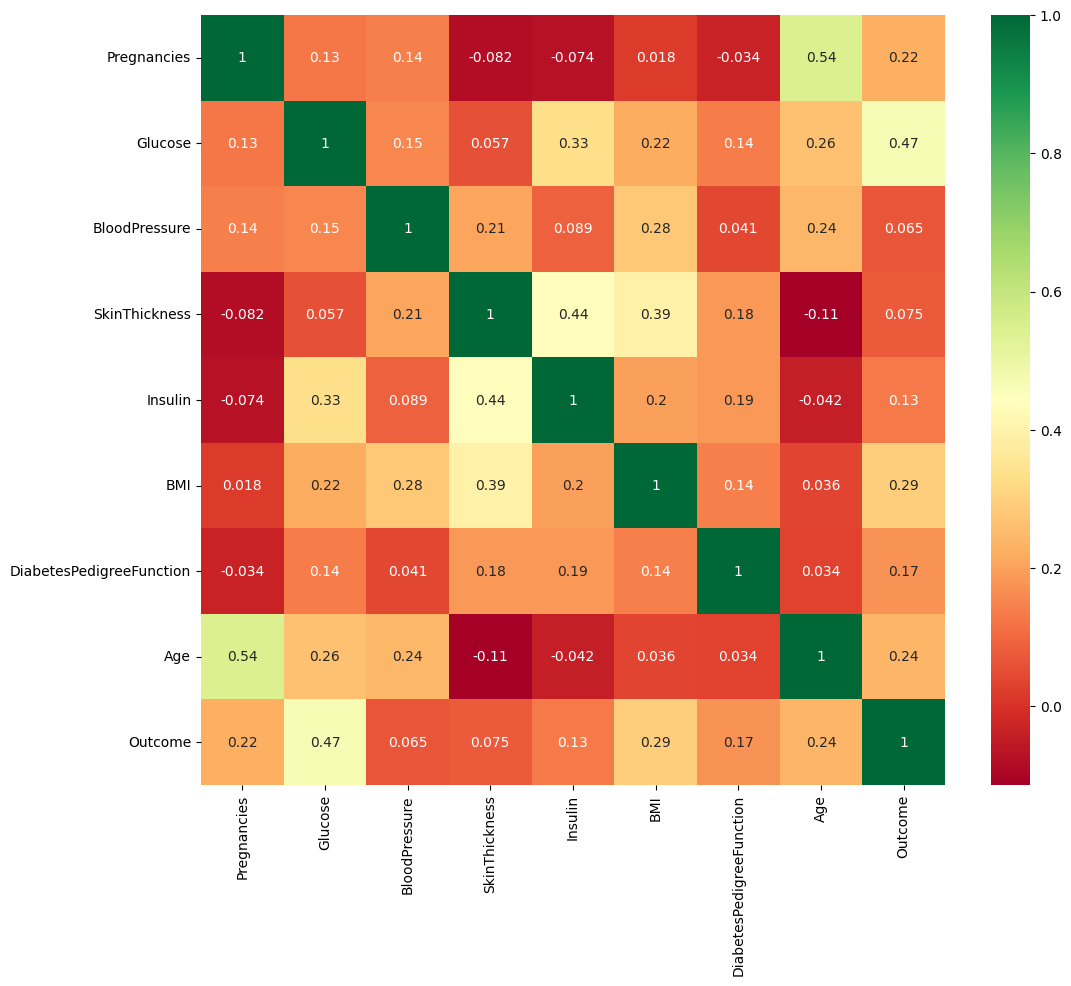

In [15]:
# Corelation between predictor variables
plt.figure(figsize=(12,10))
a = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [21]:
# Distribution of predictor Variables
df["Pregnancies"].value_counts()*100/len(df)

Pregnancies
1     17.578125
0     14.453125
2     13.411458
3      9.765625
4      8.854167
5      7.421875
6      6.510417
7      5.859375
8      4.947917
9      3.645833
10     3.125000
11     1.432292
13     1.302083
12     1.171875
14     0.260417
15     0.130208
17     0.130208
Name: count, dtype: float64

In [22]:
df["Glucose"].value_counts()*100/len(df)

Glucose
99     2.213542
100    2.213542
111    1.822917
129    1.822917
125    1.822917
         ...   
191    0.130208
177    0.130208
44     0.130208
62     0.130208
190    0.130208
Name: count, Length: 136, dtype: float64

In [24]:
df["BMI"].value_counts()*100/len(df)

BMI
32.0    1.692708
31.6    1.562500
31.2    1.562500
0.0     1.432292
32.4    1.302083
          ...   
36.7    0.130208
41.8    0.130208
42.6    0.130208
42.8    0.130208
46.3    0.130208
Name: count, Length: 248, dtype: float64

In [26]:
df["Age"].value_counts()*100/len(df)

Age
22    9.375000
21    8.203125
25    6.250000
24    5.989583
23    4.947917
28    4.557292
26    4.296875
27    4.166667
29    3.776042
31    3.125000
41    2.864583
30    2.734375
37    2.473958
42    2.343750
33    2.213542
38    2.083333
36    2.083333
32    2.083333
45    1.953125
34    1.822917
46    1.692708
43    1.692708
40    1.692708
39    1.562500
35    1.302083
50    1.041667
51    1.041667
52    1.041667
44    1.041667
58    0.911458
47    0.781250
54    0.781250
49    0.651042
48    0.651042
57    0.651042
53    0.651042
60    0.651042
66    0.520833
63    0.520833
62    0.520833
55    0.520833
67    0.390625
56    0.390625
59    0.390625
65    0.390625
69    0.260417
61    0.260417
72    0.130208
81    0.130208
64    0.130208
70    0.130208
68    0.130208
Name: count, dtype: float64

In [23]:
df["Insulin"].value_counts()*100/len(df)

Insulin
0      48.697917
105     1.432292
130     1.171875
140     1.171875
120     1.041667
         ...    
73      0.130208
171     0.130208
255     0.130208
52      0.130208
112     0.130208
Name: count, Length: 186, dtype: float64

In [17]:
#outliers
for out in df:
    
    Q1 = df[out].quantile(0.25)
    Q3 = df[out].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[out] > upper)].any(axis=None):
        print(out,"YES")
    else:
        print(out, "NO")

Pregnancies YES
Glucose NO
BloodPressure YES
SkinThickness YES
Insulin YES
BMI YES
DiabetesPedigreeFunction YES
Age YES
Outcome NO


In [38]:
# Relationship of predictor variable to each other
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


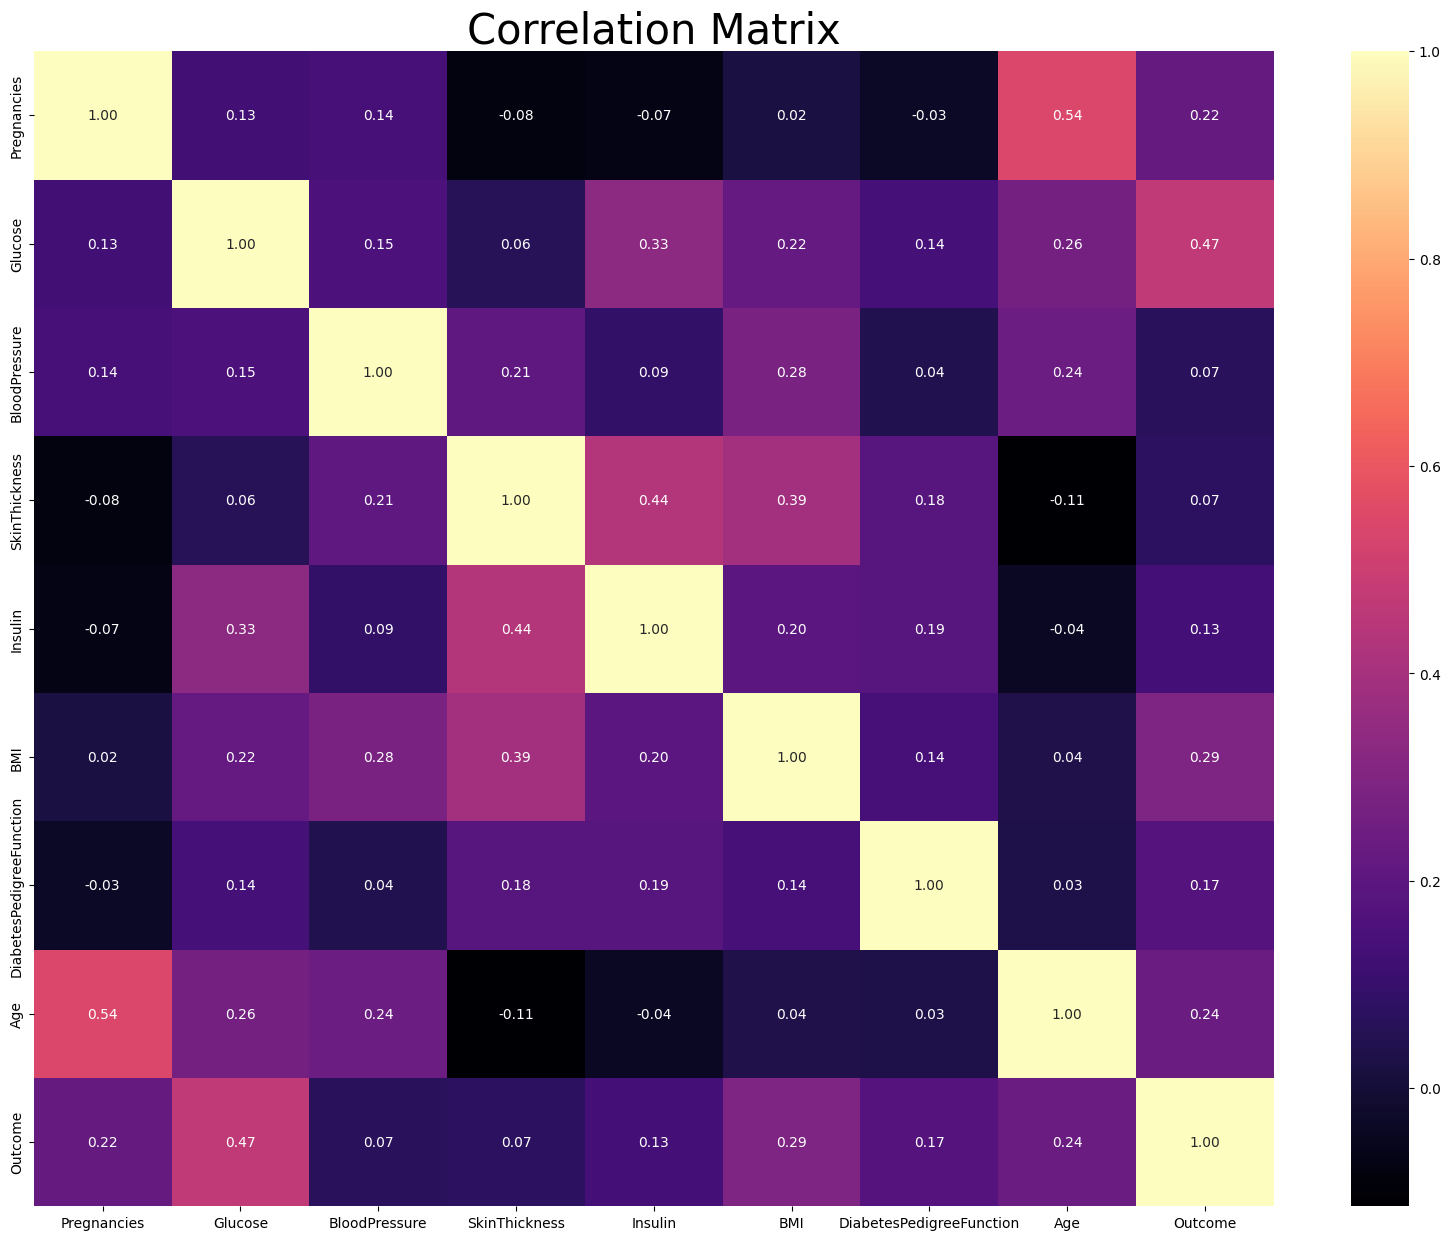

In [41]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=30)
plt.show()

Corelation matrix is used to see relationship of variables.

In [31]:
# Average age of individuals
df.agg({"Age":"mean"})

Age    33.240885
dtype: float64

Distribution of the predictor variables for individuals with diabetes and without diabetes

In [33]:
# Average glucose level for individuals with diabetes and without diabetes
df.groupby("Outcome").agg({"Glucose":"mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [32]:
# Average BMI for individuals with diabetes and without diabetes
df.groupby("Outcome").agg({"BMI":"mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


In [36]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [37]:
df.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


<Axes: xlabel='Age', ylabel='Count'>

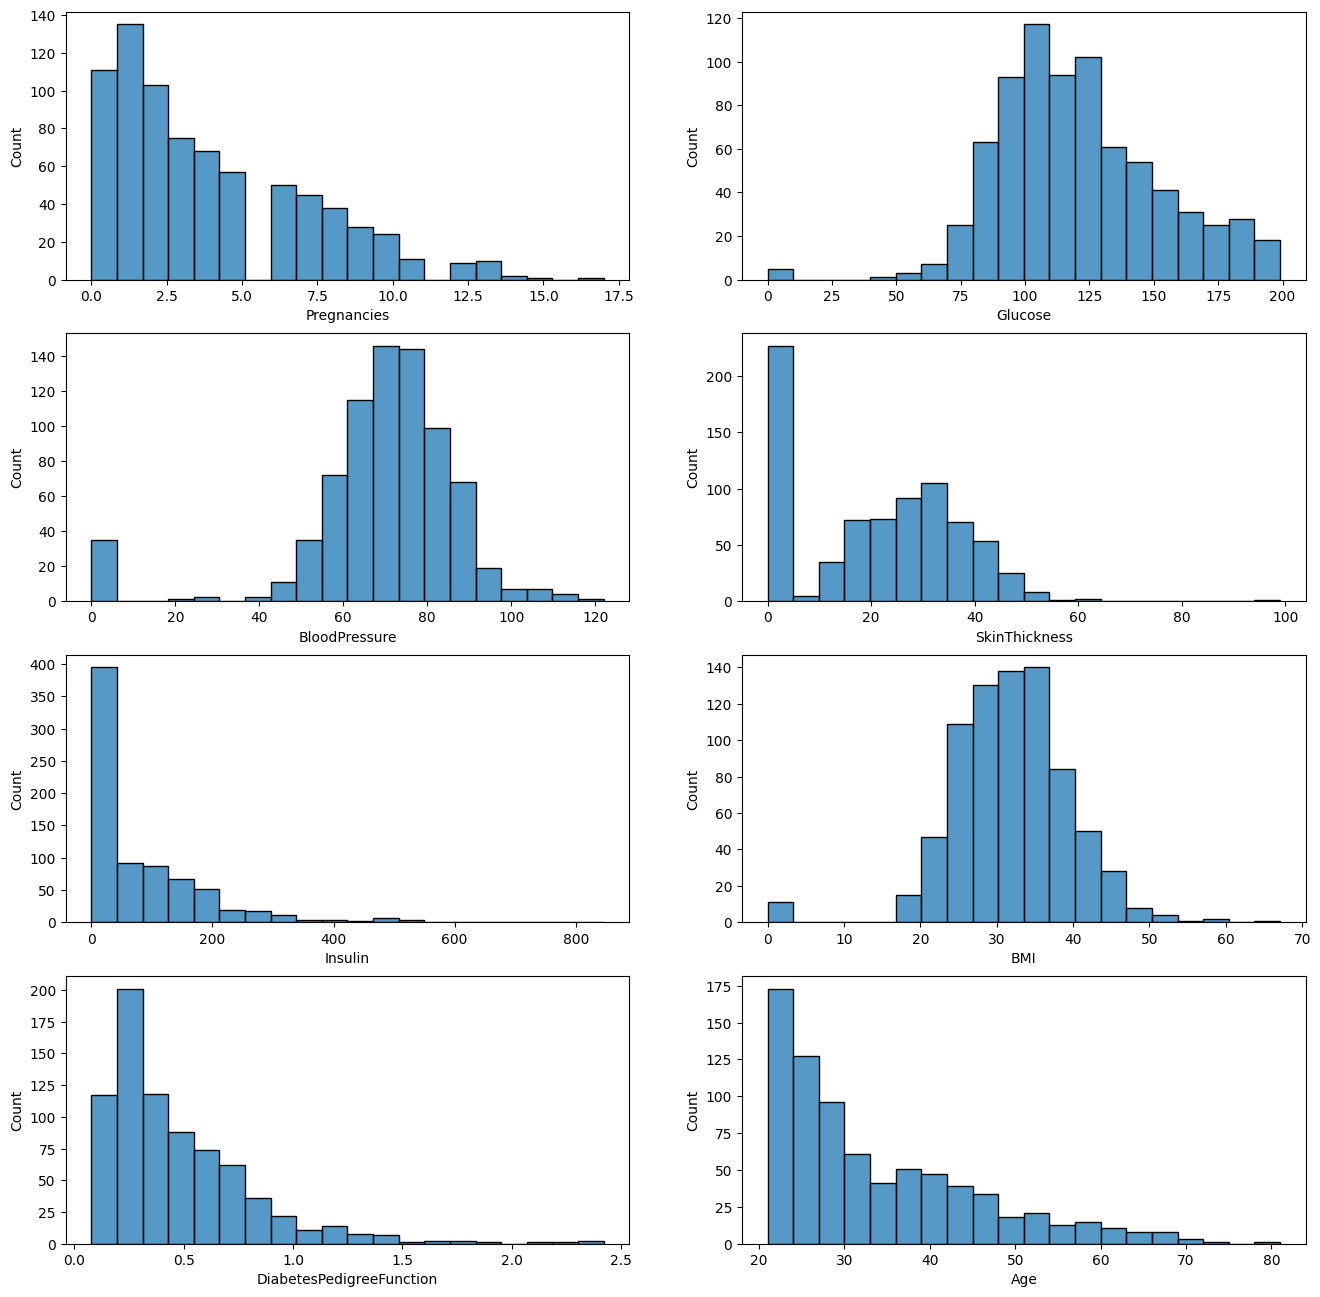

In [29]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(df.Pregnancies, bins = 20, ax=ax[0,0]) 
sns.histplot(df.Glucose, bins = 20, ax=ax[0,1]) 
sns.histplot(df.BloodPressure, bins = 20, ax=ax[1,0]) 
sns.histplot(df.SkinThickness, bins = 20, ax=ax[1,1]) 
sns.histplot(df.Insulin, bins = 20, ax=ax[2,0])
sns.histplot(df.BMI, bins = 20, ax=ax[2,1])
sns.histplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(df.Age, bins = 20, ax=ax[3,1])

TRAIN TEST SPLIT

In [ ]:
# Splitting Data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

Handling Missing Values

In [42]:
# Missing Data Analysis
X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [43]:
X_train.head()
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [44]:
X_train.isnull().sum()
X_test.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [45]:
# Fill Missing Values with medeian values
def median_value(var,df):   
    tmp = df[df[var].notnull()]
    tmp = tmp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return tmp

In [47]:
columns = X_train.columns
columns = columns.drop("Outcome")
for i in columns:
    median_value(i)
    X_train.loc[(X_train['Outcome'] == 0 ) & (X_train[i].isnull()), i] = median_value(i,X_train)[i][0]
    X_train.loc[(X_train['Outcome'] == 1 ) & (X_train[i].isnull()), i] = median_value(i,X_train)[i][1]

    X_test.loc[(X_test['Outcome'] == 0 ) & (X_test[i].isnull()), i] = median_value(i,X_test)[i][0]
    X_test.loc[(X_test['Outcome'] == 1 ) & (X_test[i].isnull()), i] = median_value(i,X_test)[i][1]

In [49]:
X_test.isnull().sum()
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

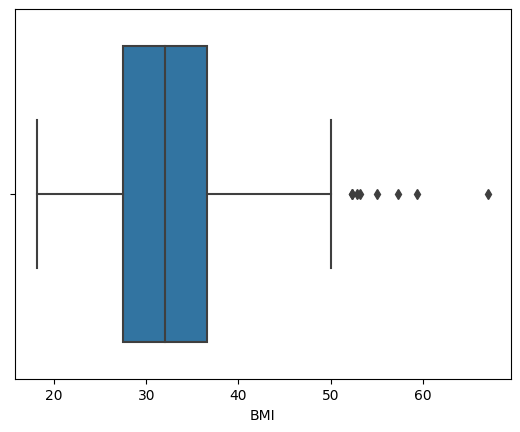

In [53]:
sns.boxplot(x = X_train["BMI"]);

In [54]:
q1 = X_train.BMI.quantile(0.25)
q3 = X_train.BMI.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
X_train.loc[X_train["BMI"] > upper,"BMI"] = upper

In [ ]:
q1 = X_test.BMI.quantile(0.25)
q3 = X_test.BMI.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
X_test.loc[X_test["BMI"] > upper,"BMI"] = upper

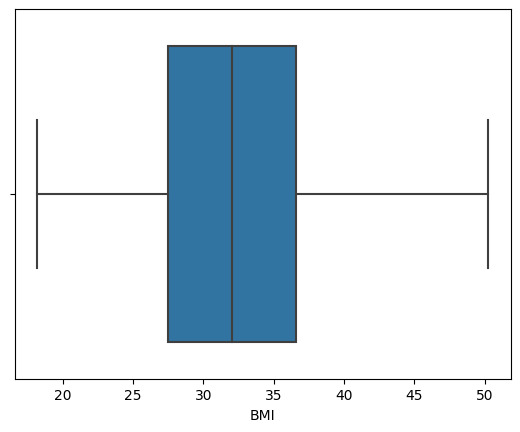

In [58]:
sns.boxplot(x = X_train["BMI"]);

In [60]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity-1", "Obesity-2"], dtype = "category")
X_train["NewBMI"] = NewBMI
X_train.loc[X_train["BMI"] < 20.5, "NewBMI"] = NewBMI[0]
X_train.loc[(X_train["BMI"] > 20.5) & (X_train["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
X_train.loc[(X_train["BMI"] > 24.9) & (X_train["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
X_train.loc[(X_train["BMI"] > 29.9) & (X_train["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
X_train.loc[X_train["BMI"] > 39.9 ,"NewBMI"] = NewBMI[4]

In [ ]:
X_test["NewBMI"] = NewBMI
X_test.loc[X_test["BMI"] < 20.5, "NewBMI"] = NewBMI[0]
X_test.loc[(X_test["BMI"] > 20.5) & (X_test["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
X_test.loc[(X_test["BMI"] > 24.9) & (X_test["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
X_test.loc[(X_test["BMI"] > 29.9) & (X_test["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
X_test.loc[X_train["BMI"] > 39.9 ,"NewBMI"] = NewBMI[4]

In [68]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
X_train["NewGlucose"] = NewGlucose
X_train.loc[X_train["Glucose"] <= 80, "NewGlucose"] = NewGlucose[0]
X_train.loc[(X_train["Glucose"] > 80) & (X_train["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
X_train.loc[(X_train["Glucose"] > 99) & (X_train["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
X_train.loc[X_train["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
X_test["NewGlucose"] = NewGlucose
X_test.loc[X_test["Glucose"] <= 80, "NewGlucose"] = NewGlucose[0]
X_test.loc[(X_test["Glucose"] > 80) & (X_test["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
X_test.loc[(X_test["Glucose"] > 99) & (X_test["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
X_test.loc[X_test["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

Model Building - Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [90]:
rfc_pred = rfc.predict(X_test)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_pred)))

Accuracy_Score = 1.0


In [97]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7795275590551181


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[137  25]
 [ 31  61]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       162
           1       0.71      0.66      0.69        92

    accuracy                           0.78       254
   macro avg       0.76      0.75      0.76       254
weighted avg       0.78      0.78      0.78       254



In our confusion matrix we can see that, we have 71% precision for predicting diabetes. Its accratley predicating for diabetes. We can see 82% were accurately predciated didn't have diabetes. 
Our model captured 66% of all true diabetics. This model has a better precision and recall as compared to decision tree.

Model Building - Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7086614173228346


In [95]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[127  35]
 [ 39  53]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       162
           1       0.60      0.58      0.59        92

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



In our confusion matrix we can see that, we have 60% precision for predicting diabetes. Its accratley predicating for diabetes. We can see 77% were accurately predciated didn't have diabetes. Our model captured 58% of all true diabetics. 

Random Foreset is preferred model for predicting diabetes. Random Forest model had a higher recall, we would rather have lower false negatives to capture as many potential diabetices as possible so they can be diagnosed. 

<Axes: >

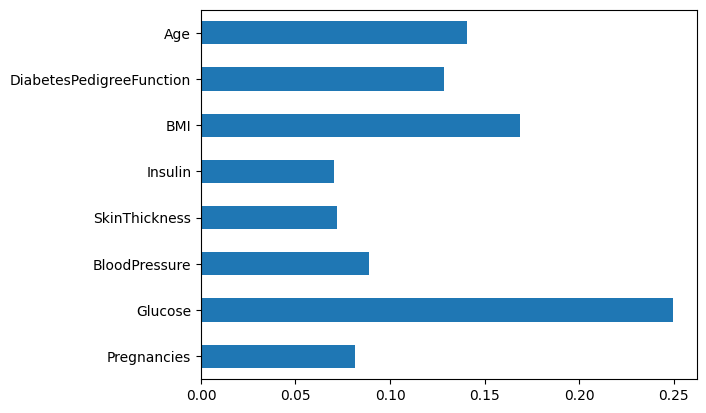

In [103]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

From above graph it is clearly visible that Glucose is the most important feature in this dataset. Random forest is better model for this prediction with accuracy score of 0.76.

In [100]:
import pickle

saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [108]:
import warnings
warnings.filterwarnings('ignore')

rfc.predict([[10,101,76,48,180,32.9,0.171,63]])

array([0], dtype=int64)

# Part IV : Conclusion

The objective of the dataset was to diagnostically predict whether a patient has diabetes or not, based on certain diagnostic measurements included in the dataset using machine learning models and to obtain maximum validation scores in the established models. 

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1) With Exploratory Data Analysis : In Data Analysis we explored the data set, types of variables & size dataset. The 0 values in the data set are missing values. Those 0 values were replaced with NaN values. Descriptive statistics of the data set were examined. There are many preidictor varibales, with the help of thise we divided data into some diffrent categories. 

2) Data Preprocessing section :  The NaN values missing observations were filled with the median. The outliers were determined.

3) During Model Building :  Created Random Forests, and decision tree models. Using machine learning models Cross Validation Score were calculated. A comparison is for false positives & negatives.

4) Model used as a result is Randon Forest model for this prediction with an accuracy of 0.76. Random Forest model has a higher recall, we would rather have lower false negatives to capture as many potential diabetices as possible so they can be diagnosed.

This machine learning Model is predicting Diabetes based on various features like Glucose level, Insulin, Age, BMI.

